#Data story telling "Modes of Persuation"
<img src ='https://www.researchgate.net/profile/Pierre-Lubis/publication/363643039/figure/fig2/AS:11431281084944647@1663513524688/Aristotles-three-means-of-persuasion.png'>


Ethos: we have to be the expert
Pathos: Decisions are not not by locig single handedly, first emotions are mapped by the brain and then logic is
Logical part comes last: we should know how to share the statistics

#UN Sustainability Goals

<img src='https://static.bond.edu.au/sites/default/files/images/SDG%20Poster%20with%20UN%20Emblem_PRINT-2.jpg'>





In [ ]:
#build scrapper to get data directly from the website
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import requests# will help get data from the website
from bs4 import BeautifulSoup#will help parse the data, make sense of the html data that we get from the website


In [ ]:
url='https://ecobici.cdmx.gob.mx/en/open-data/'

In [ ]:
requests.get(url)# 200 responce means that the connection was successful, 400 and 500 means no connection made

<Response [200]>

In [ ]:
page=requests.get(url)
page.content#got all the html code from the website, anything next to greater than sign is a tag, check them out. Beautiful soup will help us use these tags

b'<!DOCTYPE html>\n<html dir="ltr" lang="en-US"\n\tprefix="og: https://ogp.me/ns#" >\n<head>\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no"/>\n\t<meta name="format-detection" content="telephone=no"/>\n\t<link rel="profile" href="http://gmpg.org/xfn/11">\n\t<link rel="pingback" href="/xmlrpc.php">\n  \t\n\t\n\t<title>Open Data - Ecobici</title>\n\n\t\t<!-- All in One SEO 4.2.6.1 - aioseo.com -->\n\t\t<meta name="description" content="Open data Real time data ECOBICI publishes the system data in real time on the availability of bicycles and cycle stations with the GBFS standard (General Bikeshare Feed Specification). This standard is conceptually designed to provide real-time system status and therefore does not provide historical information. The information is available through a feed in json" />\n\t\t<meta name="robots" content="max-image-preview:large" />\n\t\t<link rel="canonical" href="/en/open-dat

In [ ]:
soup=BeautifulSoup(page.content)
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="http://gmpg.org/xfn/11" rel="profile"/>
  <link href="/xmlrpc.php" rel="pingback"/>
  <title>
   Open Data - Ecobici
  </title>
  <!-- All in One SEO 4.2.6.1 - aioseo.com -->
  <meta content="Open data Real time data ECOBICI publishes the system data in real time on the availability of bicycles and cycle stations with the GBFS standard (General Bikeshare Feed Specification). This standard is conceptually designed to provide real-time system status and therefore does not provide historical information. The information is available through a feed in json" name="description"/>
  <meta content="max-image-preview:large" name="robots"/>
  <link href="/en/open-data/" rel="canonical"/>
  <meta content="All in

In [ ]:
type(soup.find_all('title'))#find all gives list as an output, but the cntent is going to be identified as a beautiful soup object

bs4.element.ResultSet

In [ ]:
len(soup.find_all('a'))

255

In [ ]:
for x in soup.find_all('a'):#using a for loop here anf getting the respective href values
  print(x.get('href'))

/en/
https://usuario.ecobici.cdmx.gob.mx/
#
/en/overview/
/en/open-data/
/en/surveys-and-research/
/en/cyclist-information/
/en/statistics/
#
/en/plans-and-rates/
/en/map/
/en/know-the-app/
/en/discover-more-about-ecobici/
/en/faq/
/en/contact-us/
https://usuario.ecobici.cdmx.gob.mx/sign-in
/en/
/
https://es-la.facebook.com/ecobici/
https://www.instagram.com/ecobicicdmx/?hl=es
https://twitter.com/ecobici
https://usuario.ecobici.cdmx.gob.mx/sign-in
/en/
/
https://es-la.facebook.com/ecobici/
https://www.instagram.com/ecobicicdmx/?hl=es
https://twitter.com/ecobici
/en/
#
/en/overview/
/en/open-data/
/en/surveys-and-research/
/en/cyclist-information/
/en/statistics/
#
/en/plans-and-rates/
/en/map/
/en/know-the-app/
/en/discover-more-about-ecobici/
/en/faq/
/en/contact-us/
https://usuario.ecobici.cdmx.gob.mx/
https://gbfs.mex.lyftbikes.com/gbfs/gbfs.json
https://github.com/NABSA/gbfs

/wp-content/uploads/2024/02/ecobici_2024_enero.csv
/wp-content/uploads/2024/03/2024-02.csv
/wp-content/uplo

In [ ]:
links=list(filter(lambda x: 'csv'in x.get('href') and '2018' in x.get('href'), soup.find_all('a'))) # the total number of data sets that we will get will be from jan to dec for 2018
links
len(links)

12

In [ ]:
#we need to clean some of the links as they will still be beautiful soup objects
links[0]

<a href="/wp-content/uploads/2022/07/2018-01.csv">2018-01</a>

In [ ]:
links=[l.get('href')for l in links]
links

['/wp-content/uploads/2022/07/2018-01.csv',
 '/wp-content/uploads/2022/07/2018-02.csv',
 '/wp-content/uploads/2022/07/2018-03.csv',
 '/wp-content/uploads/2022/07/2018-04.csv',
 '/wp-content/uploads/2022/07/2018-05.csv',
 '/wp-content/uploads/2022/07/2018-06.csv',
 '/wp-content/uploads/2022/07/2018-07.csv',
 '/wp-content/uploads/2022/07/2018-08.csv',
 '/wp-content/uploads/2022/07/2018-09.csv',
 '/wp-content/uploads/2022/07/2018-10.csv',
 '/wp-content/uploads/2022/07/2018-11.csv',
 '/wp-content/uploads/2022/07/2018-12.csv']

In [ ]:
#!wget /wp-content/uploads/2022/07/2018-01.csv  we cant use wget to import all the urls at once, but we can use os
import os

In [ ]:
#"https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-01.csv"
domain="https://ecobici.cdmx.gob.mx"
os.system("wget -O 2018-01.csv https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-01.csv")

0

In [ ]:
for n in range(12):
  os.system("wget -O 2018-{0}.csv https://ecobici.cdmx.gob.mx/{1}".format(n+1,links[n]))

In [ ]:
"My name is {1} ,{0} {1}".format('James','Bond')# explaining how placeholder works

'My name is Bond ,James Bond'

In [ ]:
csvs=[dfile for dfile in os.listdir() if 'csv' in dfile]
csvs.sort()
csvs

['2018-01.csv',
 '2018-1.csv',
 '2018-10.csv',
 '2018-11.csv',
 '2018-12.csv',
 '2018-2.csv',
 '2018-3.csv',
 '2018-4.csv',
 '2018-5.csv',
 '2018-6.csv',
 '2018-7.csv',
 '2018-8.csv',
 '2018-9.csv']

In [ ]:
df=pd.read_csv(csvs[0])

<ipython-input-20-775527fd6940>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(csvs[0])


In [ ]:
df.head()# for non native, people need to change the dataframe names and also the date

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,53,9940,18,01/01/2018,0:05:48,124,01/01/2018,0:19:04
1,M,48,3759,16,01/01/2018,0:09:17,60,01/01/2018,0:32:31
2,M,63,10783,16,01/01/2018,0:09:39,60,01/01/2018,0:32:41
3,M,27,10826,16,01/01/2018,0:10:01,60,01/01/2018,0:32:39
4,M,28,10643,18,01/01/2018,0:10:02,450,01/01/2018,0:20:07


In [ ]:
df.columns

Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo',
       'Hora_Arribo'],
      dtype='object')

In [ ]:
cols=['Gender','Age','Id','Pickup_station','Pickup_date','Pickup_time','Dropoff_station','Dropoff_date','Dropoff_time']
df.columns=cols#translating to english language

In [ ]:
df.head()

,Gender,Age,Id,Pickup_station,Pickup_date,Pickup_time,Dropoff_station,Dropoff_date,Dropoff_time
0,M,53,9940,18,01/01/2018,0:05:48,124,01/01/2018,0:19:04
1,M,48,3759,16,01/01/2018,0:09:17,60,01/01/2018,0:32:31
2,M,63,10783,16,01/01/2018,0:09:39,60,01/01/2018,0:32:41
3,M,27,10826,16,01/01/2018,0:10:01,60,01/01/2018,0:32:39
4,M,28,10643,18,01/01/2018,0:10:02,450,01/01/2018,0:20:07


In [ ]:
df.Pickup_date.value_counts()

,count
Pickup_date,
10/01/2018,30224
11/01/2018,30172
09/01/2018,30166
23/01/2018,29967
22/01/2018,29683
18/01/2018,28947
31/01/2018,28754
15/01/2018,28691
25/01/2018,28643


In [ ]:
# we need to use a new data set of timestamp
#df.Pickup_date=df.Pickup_date.apply(lambda cell: pd.to_datetime(cell,Timestamp)
#df.Dropoff_date=df.Dropoff_date.apply(pd.Timestamp)
df.Pickup_date=pd.to_datetime(df.Pickup_date,dayfirst=True ,format='%d/%m/%Y')
df.Dropoff_date=pd.to_datetime(df.Dropoff_date,dayfirst=True,format='%d/%m/%Y')


In [ ]:
#data cleaning for pickup date
df.Pickup_date.min(),df.Pickup_date.max()

(Timestamp('2017-09-08 00:00:00'), Timestamp('2018-01-31 00:00:00'))

In [ ]:
#data cleaning for dropoff date
df.Dropoff_date.min(),df.Dropoff_date.max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-01-31 00:00:00'))

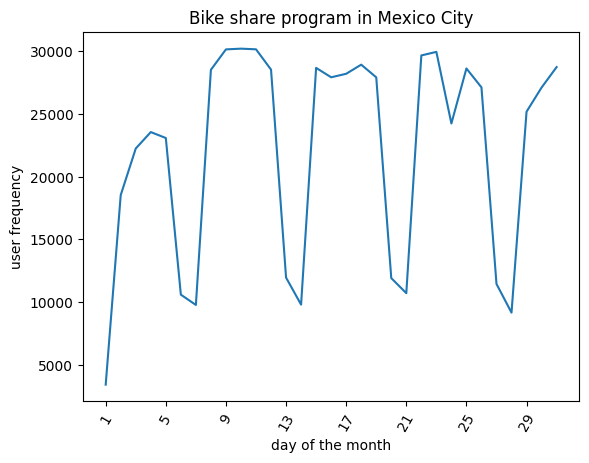

In [ ]:
#we can build time series analysis because we have time using line plot
plt.plot(df.groupby('Pickup_date').count()['Id'][6:])
plt.title('Bike share program in Mexico City')
plt.xticks(df.groupby('Pickup_date').count()['Id'][6::4].index,labels=df.groupby('Pickup_date').count()['Id'][6::4].reset_index()['Pickup_date'].dt.day.values,rotation=60)
plt.ylabel('user frequency')
plt.xlabel('day of the month')
plt.show()

In [ ]:
weekends=df[df.Pickup_date.dt.day_of_week.isin([5])].Pickup_date.unique()#date time is dt, we can call day of the week where monday is 0
weekends

<DatetimeArray>
['2018-01-06 00:00:00', '2017-12-30 00:00:00', '2018-01-13 00:00:00',
 '2018-01-20 00:00:00', '2018-01-27 00:00:00']
Length: 5, dtype: datetime64[ns]

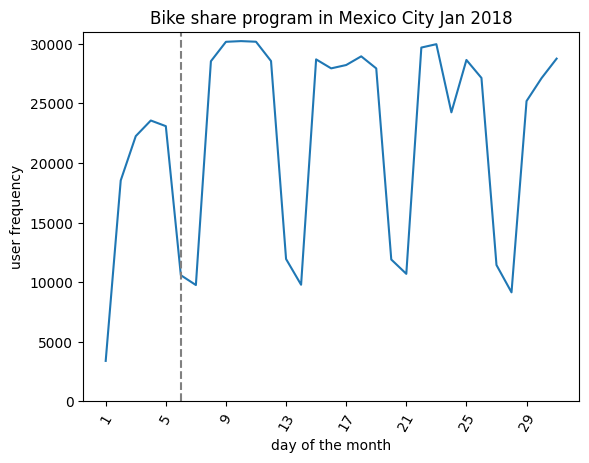

In [ ]:
#we can build time series analysis because we have determined time using line plot
plt.plot(df.groupby('Pickup_date').count()['Id'][6:])
plt.title('Bike share program in Mexico City Jan 2018')
plt.xticks(df.groupby('Pickup_date').count()['Id'][6::4].index,labels=df.groupby('Pickup_date').count()['Id'][6::4].reset_index()['Pickup_date'].dt.day.values,rotation=60)
plt.ylabel('user frequency')
plt.xlabel('day of the month')
plt.vlines(weekends[0],ymin=0,ymax=31000,linestyle='--',color='Grey')

plt.ylim(0,31000)
plt.show()

In [ ]:
#to make weekends , we need to change it to a list and then sort
weekends=df[df.Pickup_date.dt.day_of_week.isin([5])].Pickup_date.unique()#date time is dt, we can call day of the week where monday is 0
weekends=sorted(list(weekends))[1:]
weekends

[Timestamp('2018-01-06 00:00:00'),
 Timestamp('2018-01-13 00:00:00'),
 Timestamp('2018-01-20 00:00:00'),
 Timestamp('2018-01-27 00:00:00')]

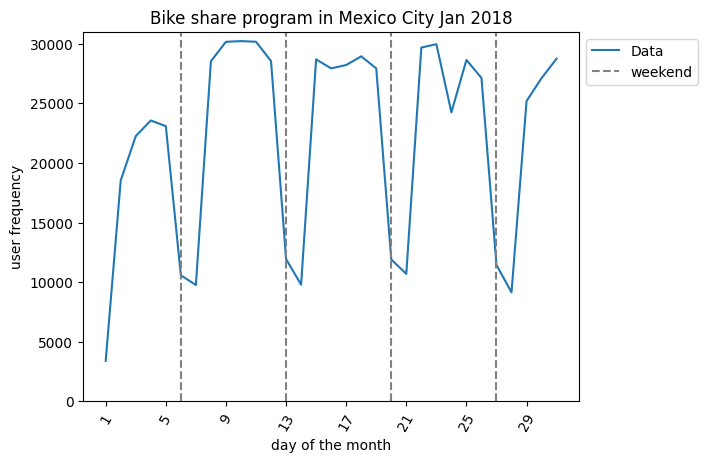

In [ ]:
#to add all the weekends
plt.plot(df.groupby('Pickup_date').count()['Id'][6:],label='Data')
plt.title('Bike share program in Mexico City Jan 2018')
plt.xlabel('day of the month')
plt.ylabel('user frequency')

plt.xticks(df.groupby('Pickup_date').count()['Id'][6::4].index,labels=df.groupby('Pickup_date').count()['Id'][6::4].reset_index()['Pickup_date'].dt.day.values,rotation=60)

plt.vlines(weekends,ymin=0,ymax=31000,linestyle='--',color='Grey',label='weekend')
# plt.vlines()

plt.legend(bbox_to_anchor=(1,1))

plt.ylim(0,31000)
plt.show()